# Importing Essential Libraries for Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt.plots import plot_objective, plot_convergence
from skopt import gp_minimize

# Extracting imputed database

In [2]:
db = pd.read_csv("TiAl_prep-db_YS-ET_TS-final_El_imp-3.csv")
db = db.iloc[:,1:]
db

,Ti,Al,Mn,Nb,Cr,Mo,V,Zr,Hf,O,...,Ru,Ni,Y,Re,TestT,logYS,logTS,logEl,logHV,logCost
0,53.000,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,3.060000,2.82,0.14,2.487138,0.582839
1,52.986,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,3.040000,2.81,0.14,2.472756,0.593444
2,52.486,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,2.820000,2.74,-0.14,2.519828,0.657259
3,52.986,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,3.040000,2.81,0.14,2.484300,0.593444
4,52.986,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,3.040000,2.81,0.14,2.510545,0.593444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,60.600,39.4,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,2.412133,2.53,-0.21,NaN,0.603887
1933,60.600,39.4,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,2.412098,2.53,-0.21,NaN,0.603887
1934,60.600,39.4,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,2.412063,2.53,-0.21,NaN,0.603887
1935,60.600,39.4,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0,0.0,0.0,298,2.412028,2.53,-0.21,NaN,0.603887


In [3]:
db = pd.concat([db.iloc[:,:-2],db.iloc[:,-1]],axis=1)
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ti       1937 non-null   float64
 1   Al       1937 non-null   float64
 2   Mn       1937 non-null   float64
 3   Nb       1937 non-null   float64
 4   Cr       1937 non-null   float64
 5   Mo       1937 non-null   float64
 6   V        1937 non-null   float64
 7   Zr       1937 non-null   float64
 8   Hf       1937 non-null   int64  
 9   O        1937 non-null   float64
 10  Ta       1937 non-null   float64
 11  Si       1937 non-null   float64
 12  W        1937 non-null   float64
 13  C        1937 non-null   float64
 14  B        1937 non-null   float64
 15  Fe       1937 non-null   float64
 16  Ru       1937 non-null   float64
 17  Ni       1937 non-null   int64  
 18  Y        1937 non-null   float64
 19  Re       1937 non-null   float64
 20  TestT    1937 non-null   int64  
 21  logYS    1937 

#### Extracting input columns and all the desired properties

In [4]:
X = db.iloc[:,:-4]
X.head()

,Ti,Al,Mn,Nb,Cr,Mo,V,Zr,Hf,O,...,Si,W,C,B,Fe,Ru,Ni,Y,Re,TestT
0,53.000,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0,0.0,0.0,298
1,52.986,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.014,0.0,0.0,0,0.0,0.0,298
2,52.486,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.5,0.0,0.014,0.0,0.0,0,0.0,0.0,298
3,52.986,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.014,0.0,0.0,0,0.0,0.0,298
4,52.986,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.014,0.0,0.0,0,0.0,0.0,298


In [5]:
y = db.iloc[:,-4:]
y.head()

,logYS,logTS,logEl,logCost
0,3.06,2.82,0.14,0.582839
1,3.04,2.81,0.14,0.593444
2,2.82,2.74,-0.14,0.657259
3,3.04,2.81,0.14,0.593444
4,3.04,2.81,0.14,0.593444


In [6]:
scalerX = StandardScaler()
X_transform = scalerX.fit_transform(X)
scalerY = StandardScaler()
y_transform = scalerY.fit_transform(y)

In [7]:
features = X.columns.values
features

array(['Ti', 'Al', 'Mn', 'Nb', 'Cr', 'Mo', 'V', 'Zr', 'Hf', 'O', 'Ta',
       'Si', 'W', 'C', 'B', 'Fe', 'Ru', 'Ni', 'Y', 'Re', 'TestT'],
      dtype=object)

In [8]:
response = y.columns.values
response

array(['logYS', 'logTS', 'logEl', 'logCost'], dtype=object)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.2, random_state=0)

In [10]:
X_train.shape

(1549, 21)

# Defining functions to calculate CV metric scores

In [11]:
from sklearn import metrics

# Function to return the mean of the metric for a particular metric name
def metrics_mean(y_ac, y_pred, metric):
    score = {'logYS':[],'logTS':[],'logEl':[],'logCost':[]}
    n = ['logYS','logTS','logEl','logCost']
    if metric == 'rmse':
        for i in range(len(n)):
            score[n[i]].append(np.sqrt(metrics.mean_squared_error(y_ac[:,i], y_pred[:,i])))
    elif metric == 'mae':
        for i in range(len(n)):
            score[n[i]].append(metrics.mean_absolute_error(y_ac[:,i], y_pred[:,i]))
    elif metric == 'R2':
        for i in range(len(n)):
            score[n[i]].append(metrics.r2_score(y_ac[:,i], y_pred[:,i]))
    else:
        for i in range(len(n)):
            score[n[i]] = np.inf
    return score

# Final function "plot" to plot the train-train predicted values, test-test predicted values and the metrics for
# each ML algorithm used
def plot(regressor_name, y_train, y_train_pred, y_test, y_test_pred):
    
    y_train = scalerY.inverse_transform(y_train)
    y_pred_train = scalerY.inverse_transform(y_train_pred)
    y_test = scalerY.inverse_transform(y_test)
    y_pred_test = scalerY.inverse_transform(y_test_pred)

    n = ['logYS','logTS','logEl','logCost']
    xtl = [r'$log_{10}\sigma_y$', r'$log_{10}\sigma$', r'$log_{10}\delta$', r'$log_{10}Cost$']
    f, axes = plt.subplots(len(n), 2, figsize=(12,35))
    
    # training set
    for i in range(len(n)):
        # plot "predicted values vs actual values and true predictions" graph for train set using first prediction
        axes[i,0].scatter(y_train[:,i],y_pred_train[:,i])
        axes[i,0].plot(y_train[:,i],y_train[:,i],'k--',lw=3)

        axes[i,0].set_xlabel('True Value',fontsize=16)
        axes[i,0].set_ylabel('Predicted Value',fontsize=16)

        # calculate the metrics
        rmse = metrics_mean(y_train,y_pred_train,'rmse')  
        mae = metrics_mean(y_train,y_pred_train,'mae')
        R2 = metrics_mean(y_train,y_pred_train,'R2')
        
        # regressor name with all metrics in the title
        axes[i,0].set_title(regressor_name+' training set'
        +'\nRMSE for '+xtl[i]+': '+str(round(rmse[n[i]][0],3))
        +'\nMAE for '+xtl[i]+': '+str(round(mae[n[i]][0],3))
        +'\nR2 for '+xtl[i]+': '+str(round(R2[n[i]][0],3)),fontsize=16, pad=10)
    
    # test set
    for i in range(len(n)):
        # plot "predicted values vs actual values and true predictions" graph for train set using first prediction
        axes[i,1].scatter(y_test[:,i],y_pred_test[:,i])
        axes[i,1].plot(y_test[:,i],y_test[:,i],'k--',lw=3)
        
        axes[i,1].set_xlabel('True Value',fontsize=16)
        axes[i,1].set_ylabel('Predicted Value',fontsize=16)
        
        # calculate the metrics
        rmse = metrics_mean(y_test,y_pred_test,'rmse')  
        mae = metrics_mean(y_test,y_pred_test,'mae')
        R2 = metrics_mean(y_test,y_pred_test,'R2')
        
        # regressor name with all metrics in the title
        axes[i,1].set_title(regressor_name+' training set'
        +'\nRMSE for '+xtl[i]+': '+str(round(rmse[n[i]][0],3))
        +'\nMAE for '+xtl[i]+': '+str(round(mae[n[i]][0],3))
        +'\nR2 for '+xtl[i]+': '+str(round(R2[n[i]][0],3)),fontsize=16, pad=10)
    
    plt.tight_layout()
    plt.show()

    # return metrics for test set to record the errors across different algorithms
    return rmse, mae, R2

Empty metrics dictionaries to store the metrics for every ML algorithm

In [12]:
rmse_scores = {}
mae_scores = {}
R2_scores = {}

# Building Random Forest, Extra Trees and Deep Neural Network Regressors

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [14]:
# Hyperparameter optimization of Random Forest Regressor
rfregressor = RandomForestRegressor(random_state=0)

rfr_space  = [Integer(1, 500, name='n_estimators'),
              Integer(1, 100, name='max_depth')]

@use_named_args(rfr_space)
def objective(**params):
    rfregressor.set_params(**params)
    return -np.mean(cross_val_score(rfregressor, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

rfr_gp = gp_minimize(objective, rfr_space, n_calls=50, n_jobs=-1, random_state=0)

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

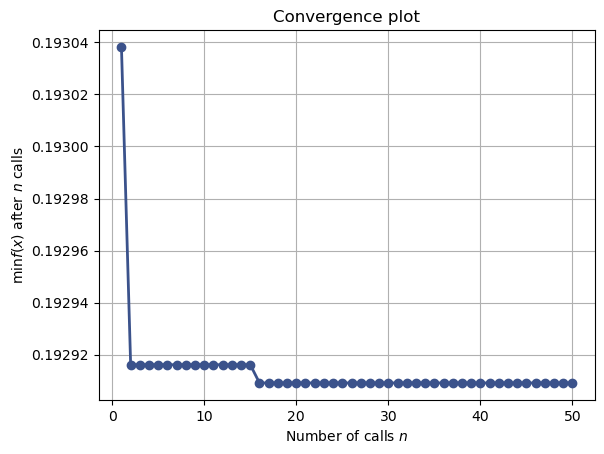

In [15]:
plot_convergence(rfr_gp)

<Axes: >

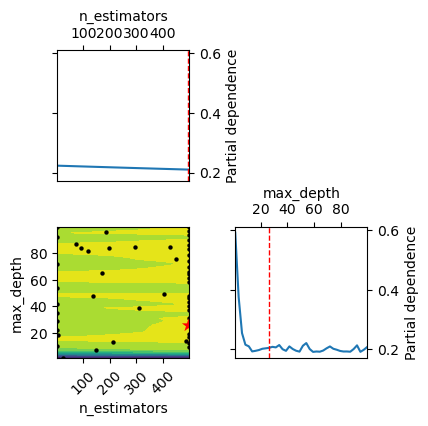

In [16]:
plot_objective(rfr_gp)

In [17]:
rfr_gp.x

[np.int64(496), np.int64(26)]

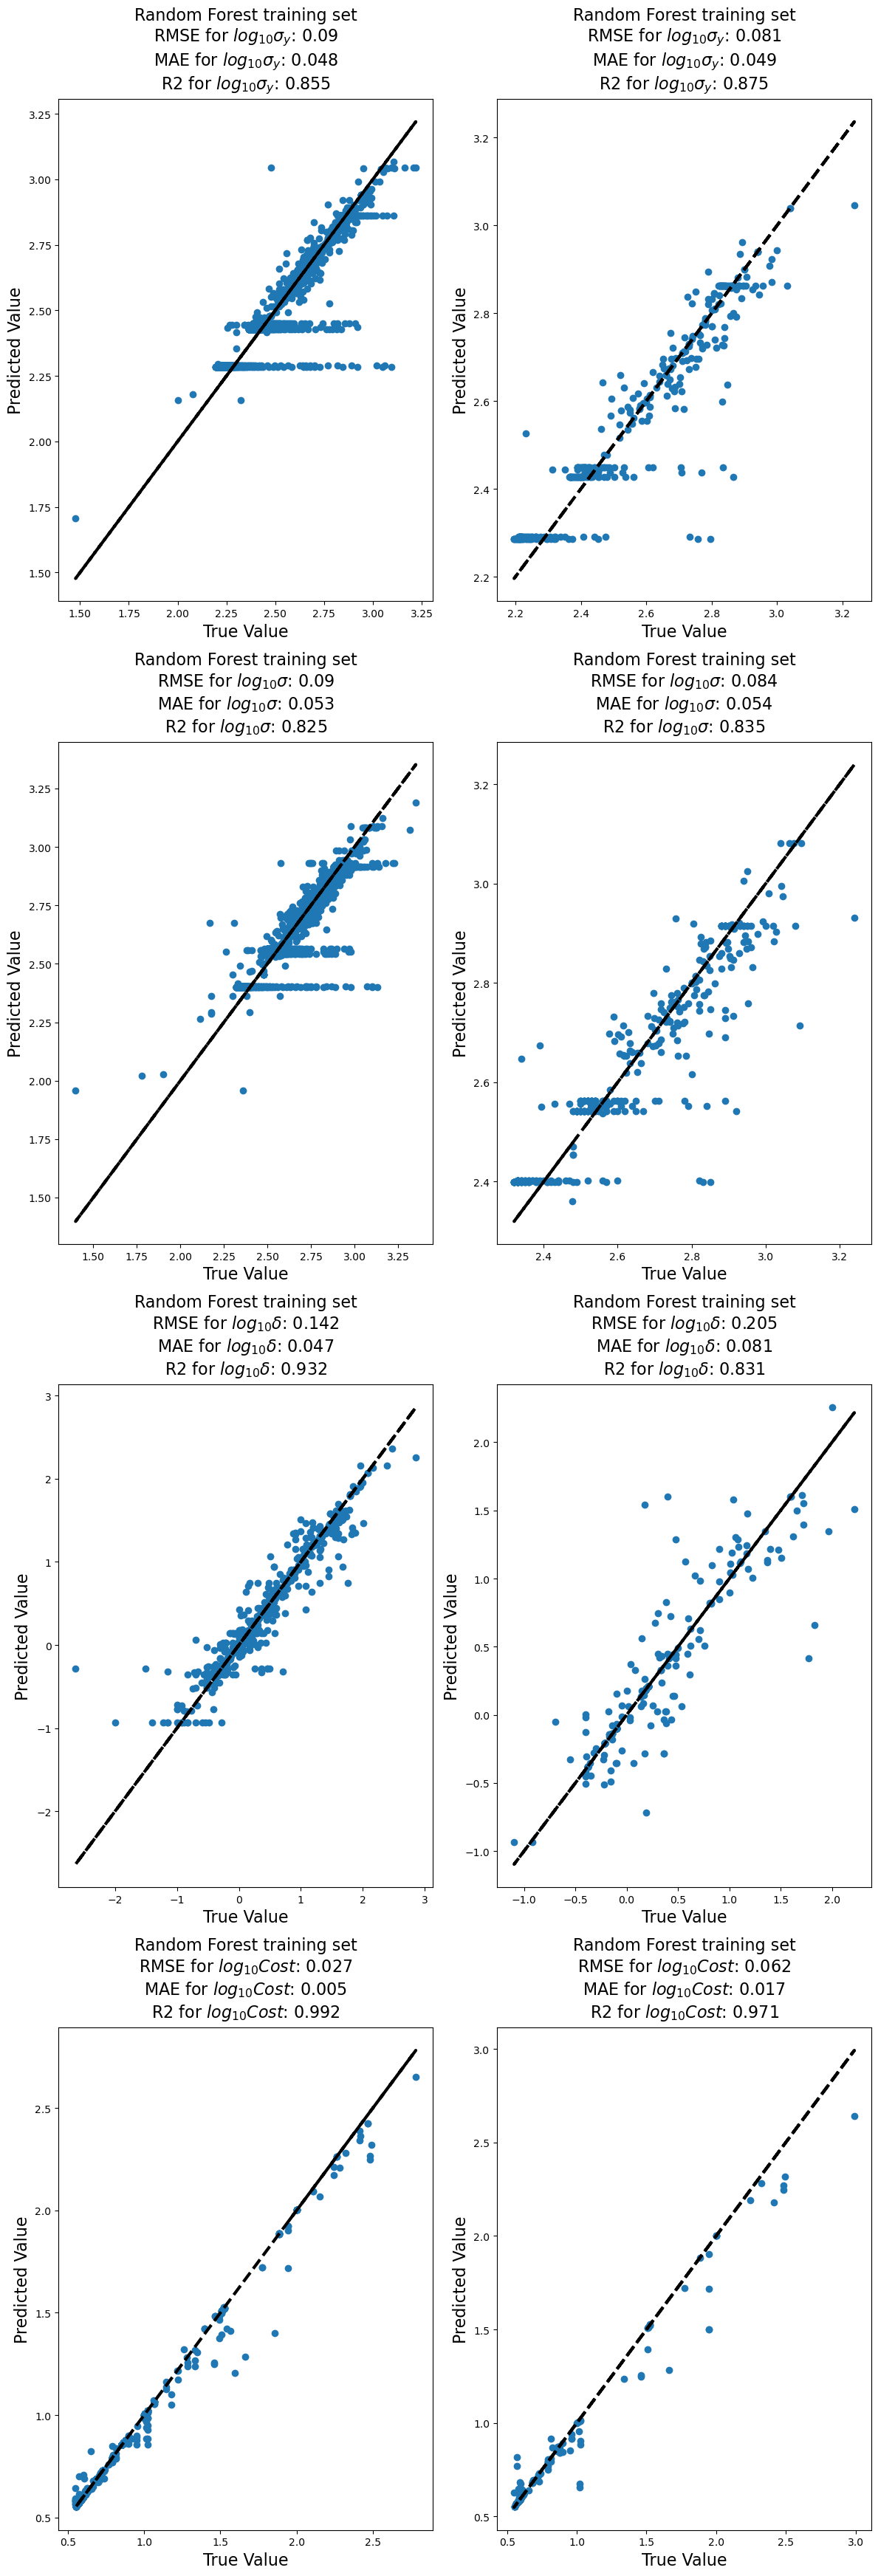

In [44]:
opt_par = rfr_gp.x

# use hyper-parameters from optimization 
n_estimators = opt_par[0]
max_depth = opt_par[1]

# Random Forest Regression
rfregressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)

rfregressor.fit(X_train,y_train)
y_pred_train = rfregressor.predict(X_train)
y_pred_test = rfregressor.predict(X_test)

rmse, mae, R2 = plot('Random Forest', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Random Forest'] = rmse
mae_scores['Random Forest'] = mae
R2_scores['Random Forest'] = R2

In [19]:
# Hyperparameter optimization of Extra Trees Regressor
etregressor = ExtraTreesRegressor(random_state=0)

etr_space  = [Integer(1, 500, name='n_estimators'),
              Integer(1, 100, name='max_depth')]

@use_named_args(etr_space)
def objective(**params):
    etregressor.set_params(**params)
    return -np.mean(cross_val_score(etregressor, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

etr_gp = gp_minimize(objective, etr_space, n_calls=50, n_jobs=-1, random_state=0)

<Axes: title={'center': 'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

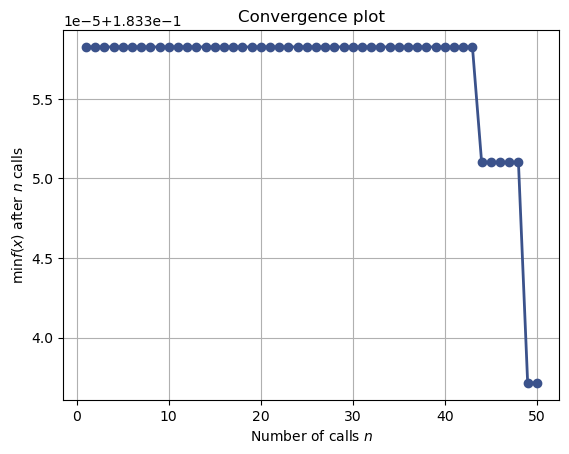

In [20]:
plot_convergence(etr_gp)

<Axes: >

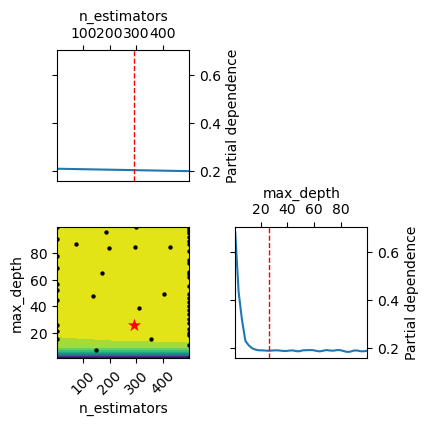

In [21]:
plot_objective(etr_gp)

In [22]:
etr_gp.x

[np.int64(293), np.int64(26)]

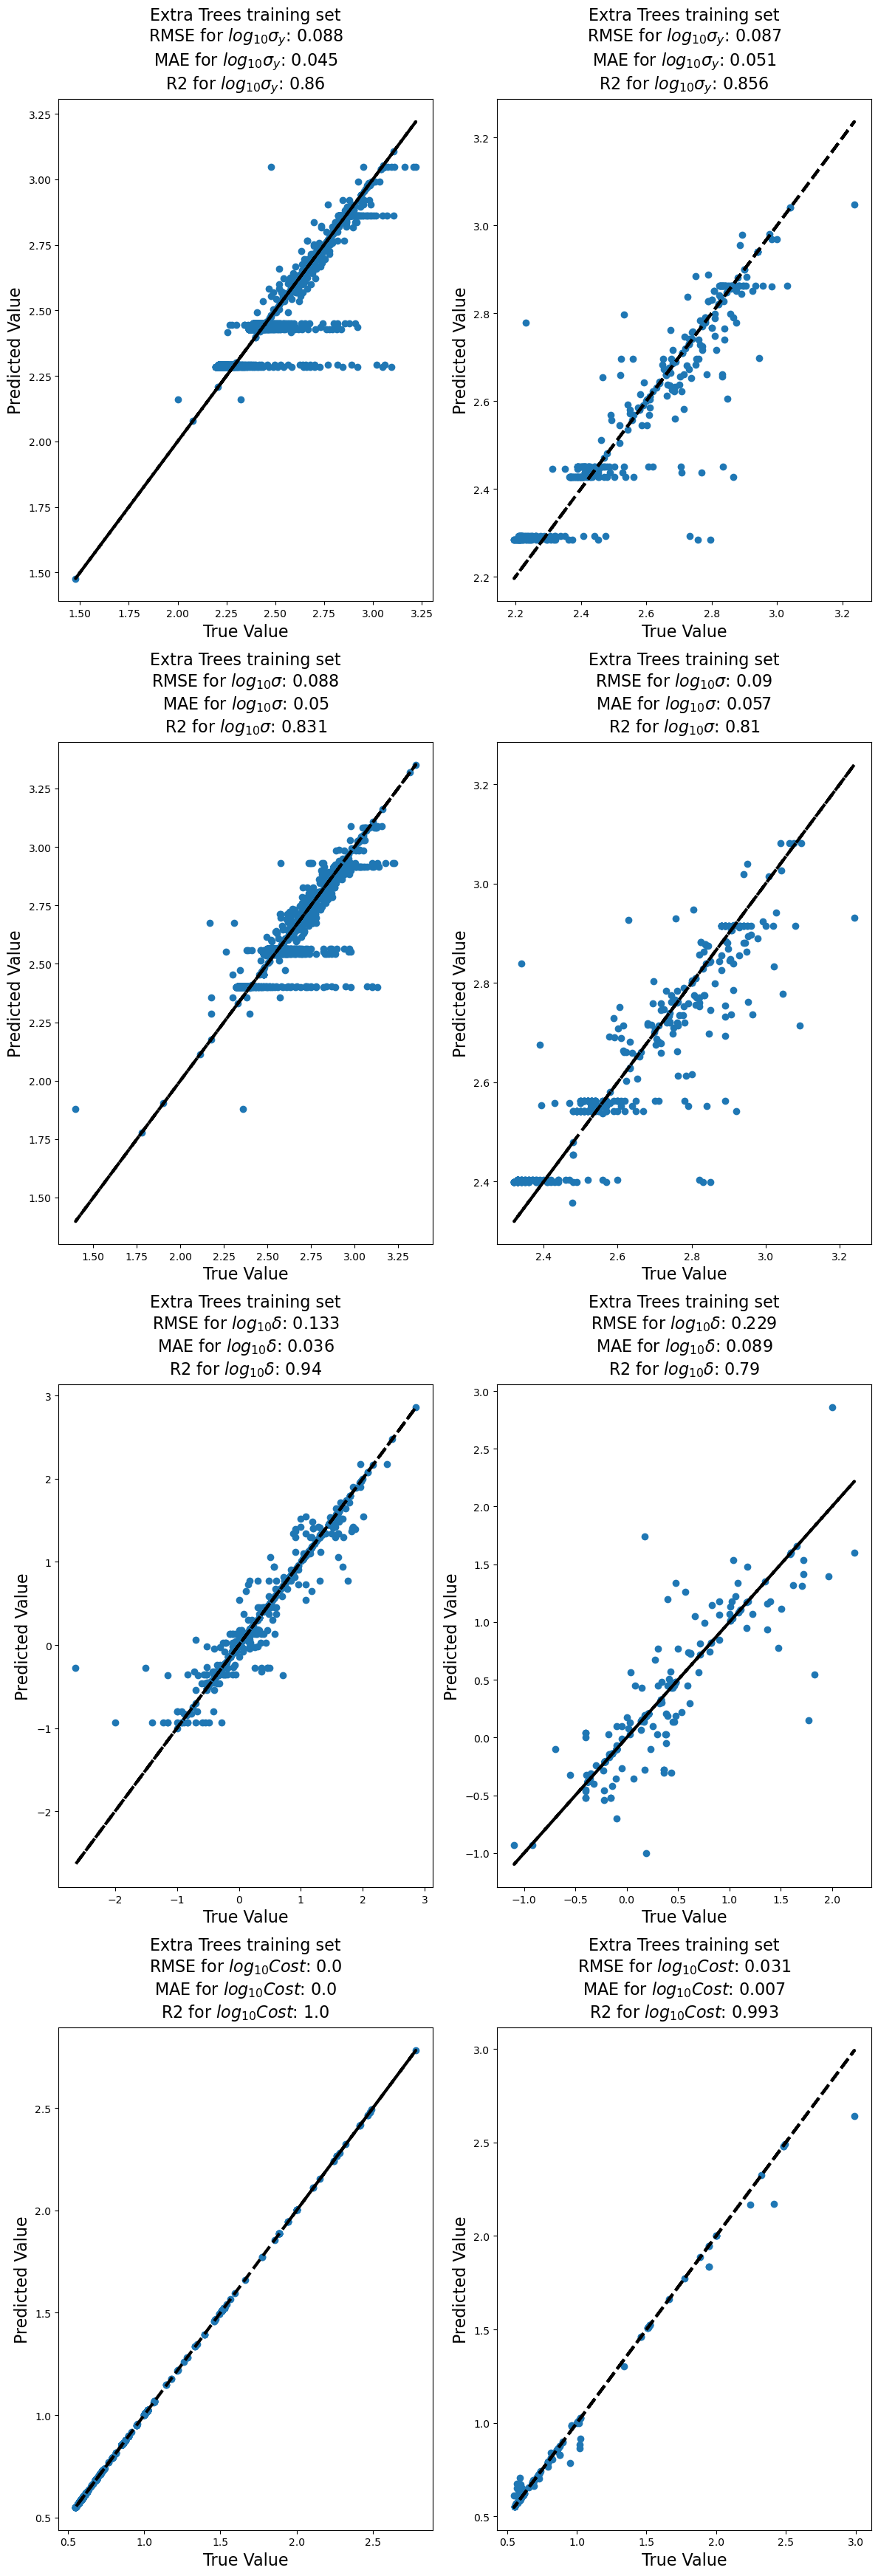

In [23]:
opt_par = etr_gp.x

# use hyper-parameters from optimization 
n_estimators = opt_par[0]
max_depth = opt_par[1]

# Extra Trees Regression
etregressor = ExtraTreesRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)

etregressor.fit(X_train,y_train)
y_pred_train = etregressor.predict(X_train)
y_pred_test = etregressor.predict(X_test)

rmse, mae, R2 = plot('Extra Trees', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Extra Trees'] = rmse
mae_scores['Extra Trees'] = mae
R2_scores['Extra Trees'] = R2

### Feature Importance

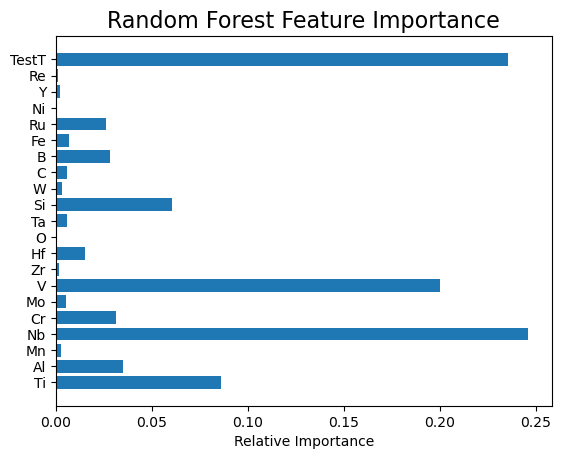

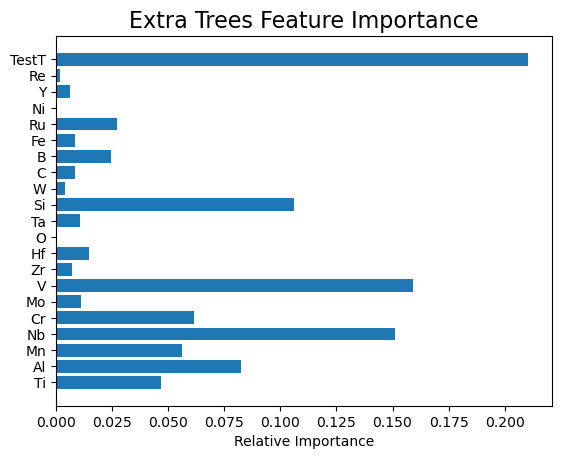

In [24]:
# defining feature importance function
def feature_importance(regr, features, title):
    
    # getting the feature importance
    feature_importance = regr.feature_importances_
    # make importances relative to max importance
    feature_importance_n = 100.0 * (feature_importance / feature_importance.max())
    
    plt.barh(range(len(feature_importance)), feature_importance, tick_label=features)

    plt.xticks(fontsize=10)
    plt.xlabel('Relative Importance')

    plt.title(title, fontsize=16)
    plt.show()

feature_importance(rfregressor, features, 'Random Forest Feature Importance')

feature_importance(etregressor, features, 'Extra Trees Feature Importance')

plt.show()

### Deep Neural Network Regressors

In [26]:
# Importing libraries for Neural Network Regression
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from keras import Sequential
from keras.layers import InputLayer, Dense, BatchNormalization

In [34]:
# Defining Hypermodel object to optimize hyperparameters for Neural Network Regression architecture with same number of units in hidden layers
class MyHyperModel(kt.HyperModel):
    
    def __init__(self,X,y):
        self.X = X
        self.y = y
    
    def build(self, hp):
        num_dense_layers = hp.Int('num_dense_layers', min_value=1, max_value=15, step=1)
        units = hp.Int('units', min_value=16, max_value=1600, step=1)
        activation = hp.Choice('activation', values=['relu', 'elu', 'tanh', 'sigmoid'])
        lr = hp.Float('learning_rate', min_value=1e-5, max_value=1e-1, sampling='log')
        optimizer = hp.Choice('optimizer', values=['Adam', 'SGD', 'RMSprop'])
        
        params = dict(num_dense_layers = num_dense_layers,
                      units=units,
                      activation = activation,
                      lr = lr,
                      optimizer=optimizer)
        
        model = Sequential()
        model.add(InputLayer(input_shape=(self.X.shape[1],))) #Input Layer with training feature data shape
        for i in range(params['num_dense_layers']):
            name = 'layer_dense_{0}'.format(i+1) #name of hidden layer
            model.add(Dense(units=params['units'],activation=params['activation'], name=name)) #add hidden layer(s)
        model.add(Dense(self.y.shape[1], activation='linear')) #final layer before output layer
        # 3 types of optimizers are used for finding the best suited with best learning rate
        if params['optimizer'] == 'Adam':
            opt = keras.optimizers.Adam(learning_rate=params['lr'])
        if params['optimizer'] == 'SGD':
            opt = keras.optimizers.SGD(learning_rate=params['lr'])
        if params['optimizer'] == 'RMSprop':
            opt = keras.optimizers.RMSprop(learning_rate=params['lr'])
        model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_squared_error'])
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(*args,
                         batch_size = hp.Int('batch_size', min_value=8, max_value=504, step=1),
                         #epochs = hp.Int('epochs', min_value=10, max_value=100, step=1),
                         validation_split=0.2,
                         **kwargs,)

In [35]:
# Hyperband Optimization from Keras-Tuner is used for hyperparameter optimization and the complete search space is stored in the working folder
import os
tuner = kt.Hyperband(MyHyperModel(X_train,y_train),
                     objective=kt.Objective("val_loss",direction="min"), max_epochs=100, factor=2,
                     overwrite=False, #in case of reloading the trial runs results
                     directory=os.path.normpath('C:/Users/shakt/Desktop/MPDNNR_TiAl_KT_Hyp'), project_name='first_run')

In [36]:
tuner.search(X_train, y_train)

Trial 359 Complete [00h 00m 34s]
val_loss: 0.18326973915100098

Best val_loss So Far: 0.18144984543323517
Total elapsed time: 00h 32m 26s
INFO:tensorflow:Oracle triggered exit


In [37]:
tuner.results_summary()

Results summary
Results in C:\Users\shakt\Desktop\MPDNNR_TiAl_KT_Hyp\first_run
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_dense_layers: 11
units: 1029
activation: relu
learning_rate: 4.161731258030334e-05
optimizer: Adam
batch_size: 78
tuner/epochs: 100
tuner/initial_epoch: 50
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 216c67b56d39631c92c5f2388cb03c3f
Score: 0.18144984543323517
Trial summary
Hyperparameters:
num_dense_layers: 11
units: 1029
activation: relu
learning_rate: 4.161731258030334e-05
optimizer: Adam
batch_size: 78
tuner/epochs: 50
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.18305164575576782
Trial summary
Hyperparameters:
num_dense_layers: 13
units: 1128
activation: relu
learning_rate: 0.00034291677691908947
optimizer: Adam
batch_size: 95
tuner/epochs: 100
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.18326973915100098
Trial summary
Hyperparameters:
num_dense_layers: 13
units

In [47]:
# Printing the best hyperparameters
best_hps=tuner.get_best_hyperparameters()[0]

for h_param in ['num_dense_layers', 'units', 'activation', 'learning_rate', 'optimizer', 'batch_size', 'tuner/epochs']:
    print(h_param, tuner.get_best_hyperparameters()[0].get(h_param))

num_dense_layers 11
units 1029
activation relu
learning_rate 4.161731258030334e-05
optimizer Adam
batch_size 78
tuner/epochs 100


In [ ]:
# Storing the hyperparameters in variable to develop the NN architecture
num_dense_layers = best_hps.get('num_dense_layers')
units = best_hps.get('units')
activation = best_hps.get('activation')
learning_rate = best_hps.get('learning_rate')
optimizer = best_hps.get('optimizer')
batchsize = best_hps.get('batch_size')
epochs = best_hps.get('tuner/epochs')

In [28]:
# function to develop NN architecture with same number of units in all hidden layers
def build_and_compile_model(num_dense_layers,units,activation,lr,optimizer):
    model = keras.Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1],))) #Input Layer with training feature data shape
    for i in range(num_dense_layers):
        name = 'layer_dense_{0}'.format(i+1) #name of hidden layer
        model.add(Dense(units,activation=activation,name=name)) #add hidden layer(s)
    model.add(Dense(y_train.shape[1], activation='linear')) #final layer before output layer
    if optimizer == 'Adam':
        opt = keras.optimizers.Adam(learning_rate=lr)
    if optimizer == 'SGD':
        opt = keras.optimizers.SGD(learning_rate=lr)
    if optimizer == 'RMSprop':
        opt = keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_squared_error'])
    return model

In [29]:
# Create the neural network with these hyper-parameters.
model1 = build_and_compile_model(num_dense_layers, units, activation, learning_rate, optimizer)
    
# Train the model.
history = model1.fit(X_train, y_train, epochs=epochs, batch_size=batchsize, validation_split=0.2, verbose=0)

/home/shakti/miniconda3/envs/tf_ml_dl_env/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
I0000 00:00:1750651994.607211    3222 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1753 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1750651997.888500    4406 service.cc:152] XLA service 0x766b0c018ce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750651997.888575    4406 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-06-22 23:13:17.970534: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750651998.494885    4406 cuda_dnn.cc:5

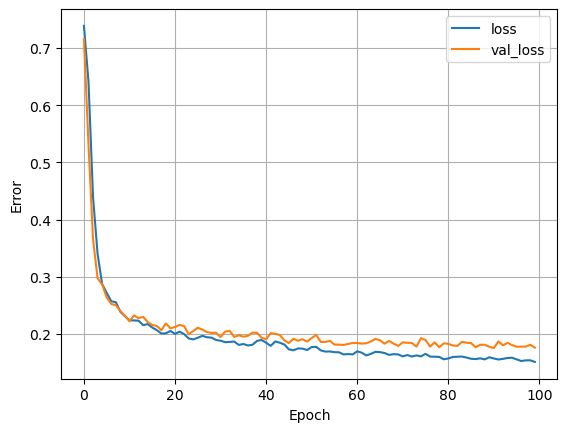

In [30]:
#function to plot the training and validation history of the NN
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

plot_loss(history)

2025-06-22 23:14:08.769554: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 152 bytes spill stores, 152 bytes spill loads

2025-06-22 23:14:09.013193: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 192 bytes spill stores, 192 bytes spill loads

2025-06-22 23:14:09.370587: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 80 bytes spill stores, 80 bytes spill loads

2025-06-22 23:14:09.507146: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 376 bytes spill stores, 376 bytes spill loads

2025-06-22 23:14:09.509254: I external/loc

48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

2025-06-22 23:14:13.095773: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 180 bytes spill stores, 180 bytes spill loads

2025-06-22 23:14:13.236977: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 152 bytes spill stores, 152 bytes spill loads

2025-06-22 23:14:13.529662: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 172 bytes spill stores, 180 bytes spill loads

2025-06-22 23:14:13.535099: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 384 bytes spill stores, 384 bytes spill loads

2025-06-22 23:14:14.136070: I external/l

49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

2025-06-22 23:14:16.972833: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 168 bytes spill stores, 168 bytes spill loads

2025-06-22 23:14:17.224525: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 184 bytes spill stores, 184 bytes spill loads

2025-06-22 23:14:17.279110: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 408 bytes spill stores, 408 bytes spill loads

2025-06-22 23:14:17.358969: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 152 bytes spill stores, 152 bytes spill loads

2025-06-22 23:14:17.988196: I external/l

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step


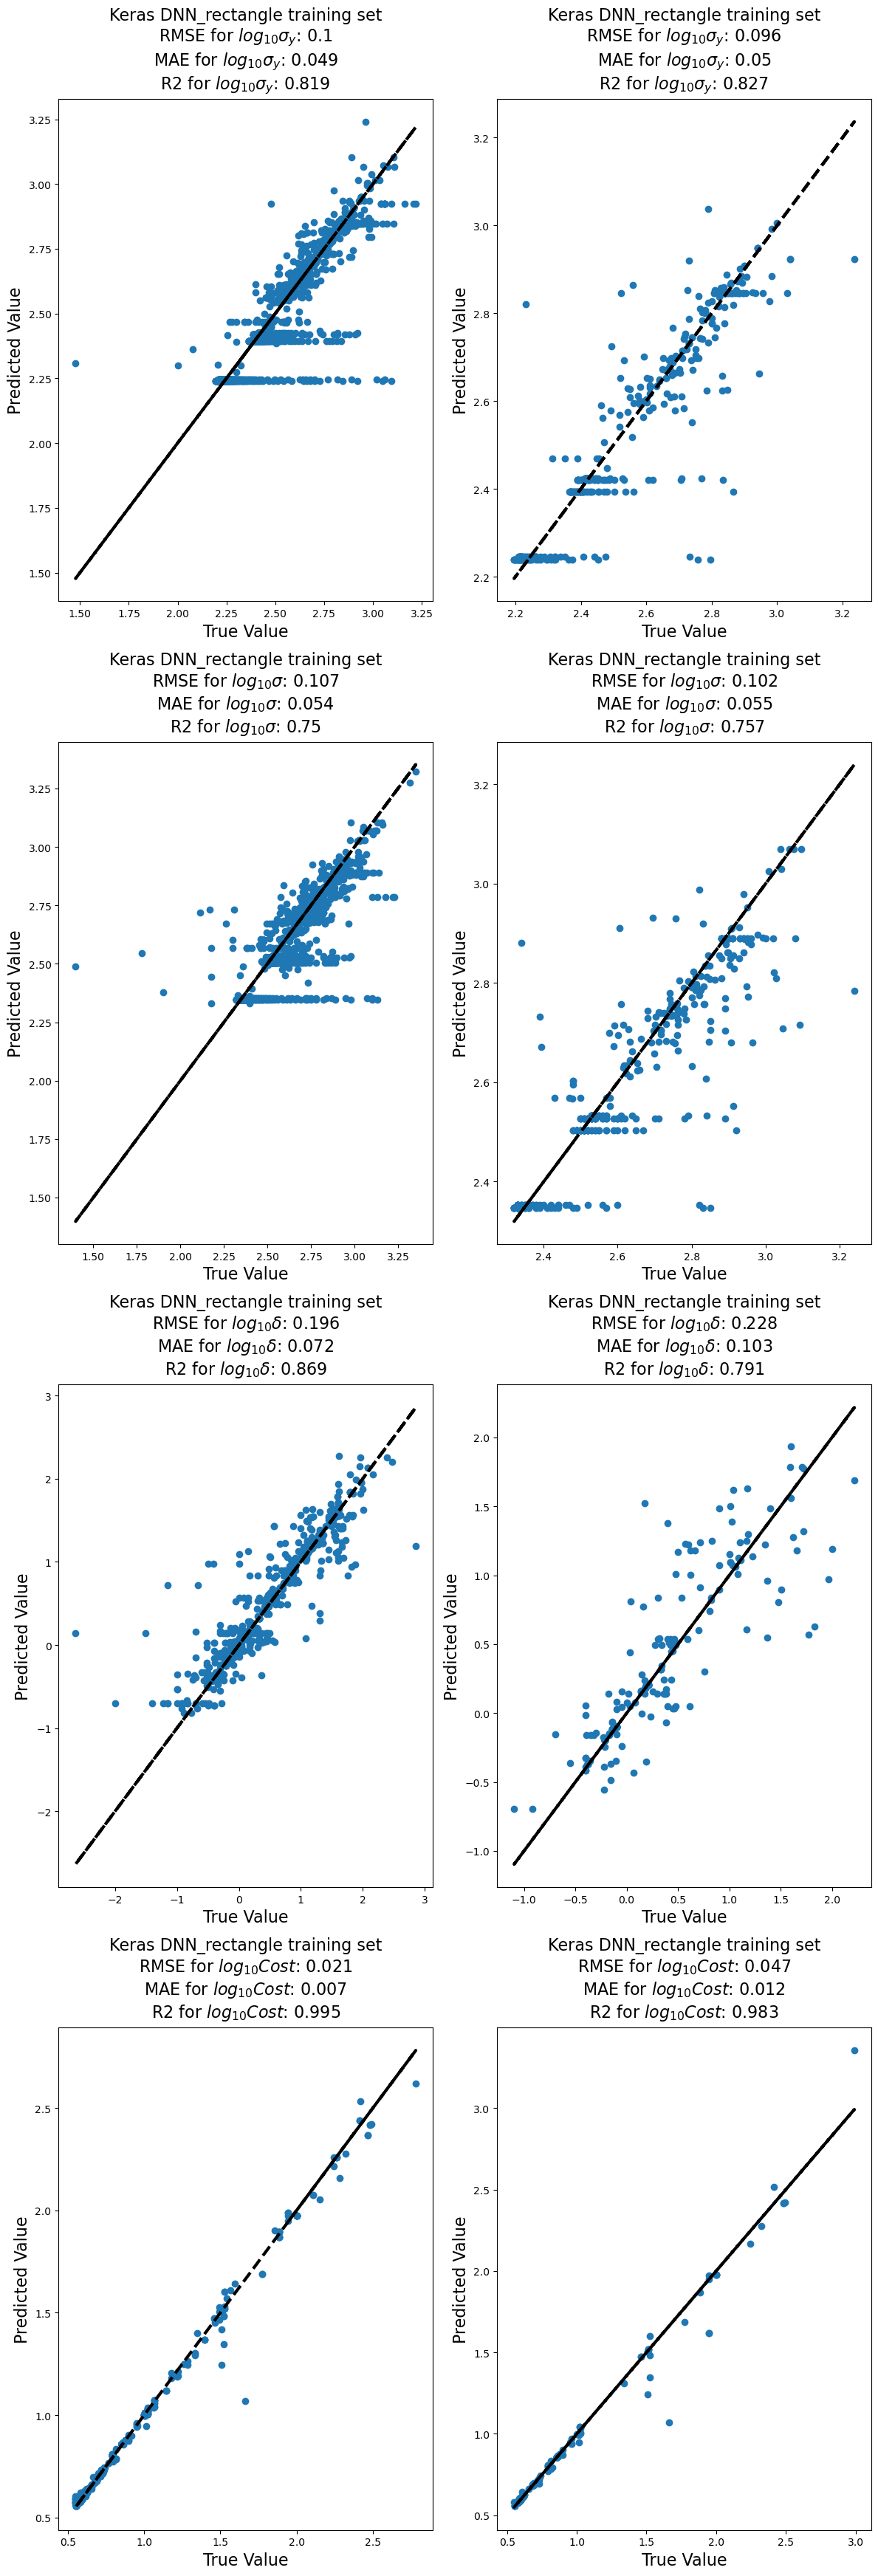

In [31]:
# Use the trained Keras model to predict on the training and test sets
y_pred_train=model1.predict(X_train)
y_pred_test=model1.predict(X_test)

# Plot the training results
rmse, mae, R2 = plot('Keras DNN_rectangle', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Keras DNN_rectangle'] = rmse
mae_scores['Keras DNN_rectangle'] = mae
R2_scores['Keras DNN_rectangle'] = R2

In [68]:
# Defining Hypermodel object to optimize hyperparameters for Neural Network Regression architecture with different number of units in different hidden layers
class MyHyperModel2(kt.HyperModel):
    
    def __init__(self,X,y):
        self.X = X
        self.y = y
    
    def build(self, hp):
        lr = hp.Float('learning_rate', min_value=1e-5, max_value=1e-1, sampling='log')
        optimizer = hp.Choice('optimizer', values=['Adam', 'SGD', 'RMSprop'])
        
        params = dict(lr = lr,
                      optimizer=optimizer)
        
        activation = 'relu'
        model = Sequential()
        model.add(InputLayer(input_shape=(self.X.shape[1],))) #Input Layer with training feature data shape
        model.add(BatchNormalization())
        #The number of hidden layers are same as previous NN achitecture
        model.add(Dense(units=21*49,activation=activation, name='layers_dense_1')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=21*45,activation=activation, name='layers_dense_2')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=21*41,activation=activation, name='layers_dense_3')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=21*37,activation=activation, name='layers_dense_4')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=21*33,activation=activation, name='layers_dense_5')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=21*29,activation=activation, name='layers_dense_6')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=21*25,activation=activation, name='layers_dense_7')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=21*21,activation=activation, name='layers_dense_8')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=21*17,activation=activation, name='layers_dense_9')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=21*13,activation=activation, name='layers_dense_10')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=21*9,activation=activation, name='layers_dense_11')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(self.y.shape[1], activation='linear')) #final layer before output layer
        # 3 types of optimizers are used for finding the best suited with best learning rate
        if params['optimizer'] == 'Adam':
            opt = keras.optimizers.Adam(learning_rate=params['lr'])
        if params['optimizer'] == 'SGD':
            opt = keras.optimizers.SGD(learning_rate=params['lr'])
        if params['optimizer'] == 'RMSprop':
            opt = keras.optimizers.RMSprop(learning_rate=params['lr'])
        model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_squared_error'])
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(*args,
                         batch_size = 78,
                         #epochs = hp.Int('epochs', min_value=10, max_value=100, step=1),
                         validation_split=0.2,
                         **kwargs,)

In [69]:
# Hyperband Optimization from Keras-Tuner is used for hyperparameter optimization and the complete search space is stored in the working folder
import os
tuner2 = kt.Hyperband(MyHyperModel2(X_train,y_train),
                     objective=kt.Objective("val_loss",direction="min"), max_epochs=200, factor=3,
                     overwrite=True, #in case of reloading the trial runs results
                     directory=os.path.normpath('C:/Users/shakt/Desktop/MPDNNR_TiAl_KT_Hyp'), project_name='first_run_converge')

In [70]:
tuner2.search(X_train, y_train)

Trial 254 Complete [00h 01m 04s]
val_loss: 0.18502433598041534

Best val_loss So Far: 0.18502433598041534
Total elapsed time: 00h 49m 23s
INFO:tensorflow:Oracle triggered exit


In [71]:
tuner2.results_summary()

Results summary
Results in C:\Users\shakt\Desktop\MPDNNR_TiAl_KT_Hyp\first_run_converge
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
learning_rate: 0.000501071480558025
optimizer: Adam
tuner/epochs: 200
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.18502433598041534
Trial summary
Hyperparameters:
learning_rate: 0.015175549462122856
optimizer: SGD
tuner/epochs: 200
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.2034061998128891
Trial summary
Hyperparameters:
learning_rate: 0.001276169814305922
optimizer: Adam
tuner/epochs: 200
tuner/initial_epoch: 67
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 4506ab21d632712a49c4a5adc907c704
Score: 0.204746812582016
Trial summary
Hyperparameters:
learning_rate: 0.001170776534629005
optimizer: Adam
tuner/epochs: 200
tuner/initial_epoch: 67
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: ab7cf80953b280db3dfd7de4955167ca
Score: 0.20557467639446259
Trial summary
Hyp

In [72]:
# Printing the best hyperparameters
best_hps_2=tuner2.get_best_hyperparameters()[0]

for h_param in ['learning_rate','optimizer','tuner/epochs']:
    print(h_param, tuner2.get_best_hyperparameters()[0].get(h_param))

learning_rate 0.000501071480558025
optimizer Adam
tuner/epochs 200


In [ ]:
# Storing the hyperparameters in variables to develop the NN architecture
learning_rate = best_hps_2.get('learning_rate')
optimizer = best_hps_2.get('optimizer')
epochs = best_hps_2.get('tuner/epochs')
activation = 'relu'
batch_size = 78

In [33]:
# function to develop NN architecture with different number of units in different hidden layers
def compile_model(activation,lr,optimizer):
    model = keras.Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1],))) #Input Layer with training feature data shape
    name = 'layer_dense_1'#name of hidden layer
    model.add(Dense(21*49, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_2'#name of hidden layer
    model.add(Dense(21*45, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_3'#name of hidden layer
    model.add(Dense(21*41, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_4'#name of hidden layer
    model.add(Dense(21*37, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_5'#name of hidden layer
    model.add(Dense(21*33, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_6'#name of hidden layer
    model.add(Dense(21*29, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_7'#name of hidden layer
    model.add(Dense(21*25, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_8'#name of hidden layer
    model.add(Dense(21*21, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_9'#name of hidden layer
    model.add(Dense(21*17, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_10'#name of hidden layer
    model.add(Dense(21*13, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_11'#name of hidden layer
    model.add(Dense(21*9, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    model.add(Dense(y_train.shape[1], activation='linear')) #final layer before output layer
    if optimizer == 'Adam':
        opt = keras.optimizers.Adam(learning_rate=lr)
    if optimizer == 'RMSprop':
        opt = keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_squared_error'])
    return model

In [34]:
# Create the neural network with these hyper-parameters.
model2 = compile_model(activation,learning_rate,optimizer)

# Train the model.
history = model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

/home/shakti/miniconda3/envs/tf_ml_dl_env/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


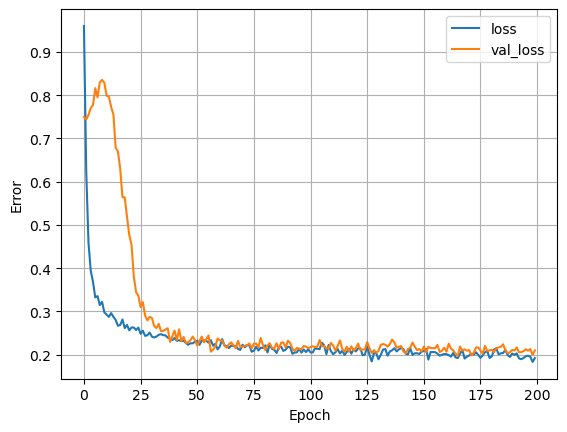

In [35]:
plot_loss(history)

49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


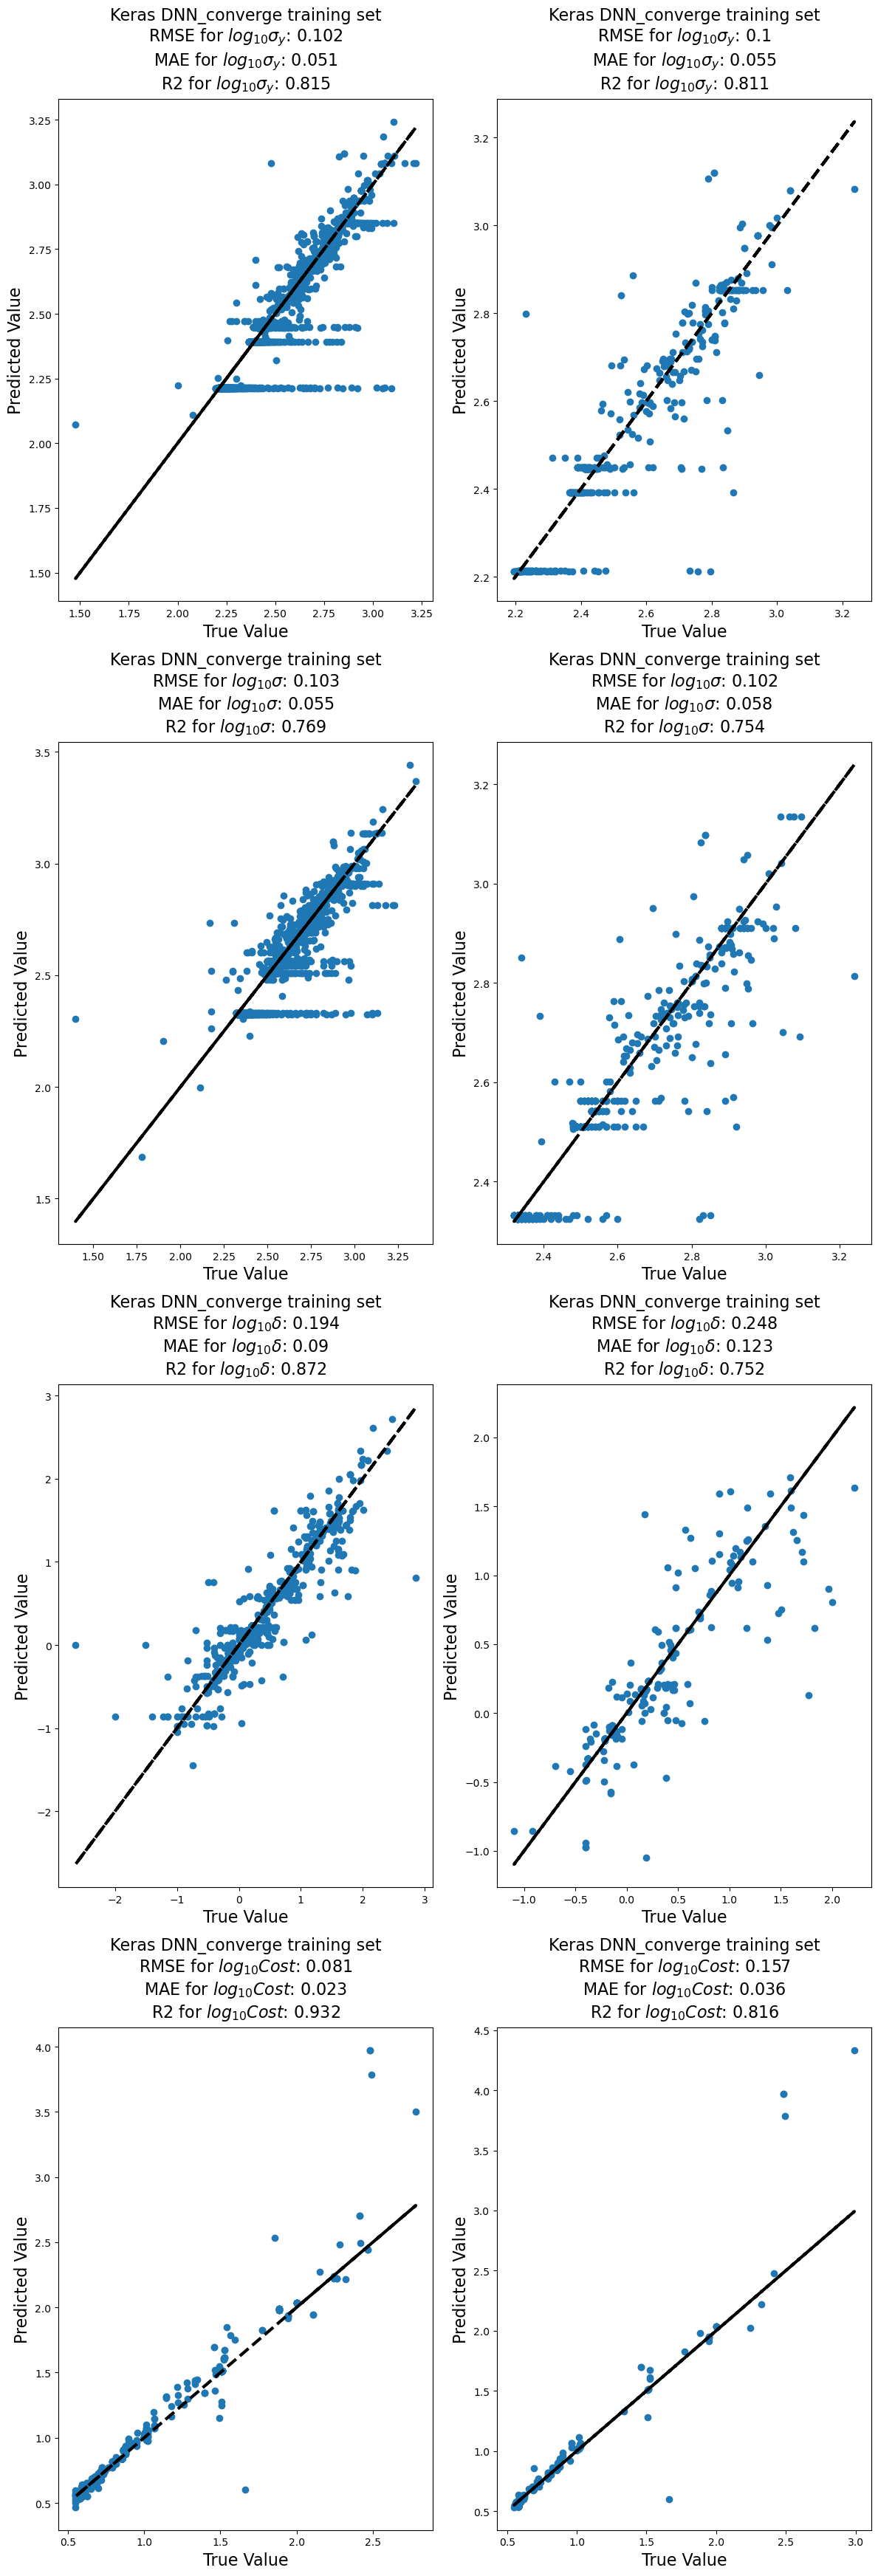

In [36]:
# Use the trained Keras model to predict on the training and test sets
y_pred_train=model2.predict(X_train)
y_pred_test=model2.predict(X_test)

# Plot the training results
rmse, mae, R2 = plot('Keras DNN_converge', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Keras DNN_converge'] = rmse
mae_scores['Keras DNN_converge'] = mae
R2_scores['Keras DNN_converge'] = R2

In [85]:
# Defining Hypermodel object to optimize hyperparameters for Neural Network Regression architecture with different number of units in different hidden layers
class MyHyperModel3(kt.HyperModel):
    
    def __init__(self,X,y):
        self.X = X
        self.y = y
    
    def build(self, hp):
        units_1 = hp.Int('units_1', min_value=16, max_value=1600, step=1)
        units_2 = hp.Int('units_2', min_value=16, max_value=1600, step=1)
        units_3 = hp.Int('units_3', min_value=16, max_value=1600, step=1)
        units_4 = hp.Int('units_4', min_value=16, max_value=1600, step=1)
        units_5 = hp.Int('units_5', min_value=16, max_value=1600, step=1)
        units_6 = hp.Int('units_6', min_value=16, max_value=1600, step=1)
        units_7 = hp.Int('units_7', min_value=16, max_value=1600, step=1)
        units_8 = hp.Int('units_8', min_value=16, max_value=1600, step=1)
        units_9 = hp.Int('units_9', min_value=16, max_value=1600, step=1)
        units_10 = hp.Int('units_10', min_value=16, max_value=1600, step=1)
        units_11 = hp.Int('units_11', min_value=16, max_value=1600, step=1)
        activation = hp.Choice('activation', values=['relu', 'elu', 'tanh', 'sigmoid'])
        lr = hp.Float('learning_rate', min_value=1e-5, max_value=1e-1, sampling='log')
        optimizer = hp.Choice('optimizer', values=['Adam', 'SGD', 'RMSprop'])
        
        params = dict(units_1=units_1,
                      units_2=units_2,
                      units_3=units_3,
                      units_4=units_4,
                      units_5=units_5,
                      units_6=units_6,
                      units_7=units_7,
                      units_8=units_8,
                      units_9=units_9,
                      units_10=units_10,
                      units_11=units_11,
                      activation = activation,
                      lr = lr,
                      optimizer=optimizer)
        
        model = Sequential()
        model.add(InputLayer(input_shape=(self.X.shape[1],))) #Input Layer with training feature data shape
        model.add(BatchNormalization())
        #The number of hidden layers are same as previous NN achitecture
        model.add(Dense(units=params['units_1'],activation=params['activation'], name='layers_dense_1')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_2'],activation=params['activation'], name='layers_dense_2')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_3'],activation=params['activation'], name='layers_dense_3')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_4'],activation=params['activation'], name='layers_dense_4')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_5'],activation=params['activation'], name='layers_dense_5')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_6'],activation=params['activation'], name='layers_dense_6')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_7'],activation=params['activation'], name='layers_dense_7')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_8'],activation=params['activation'], name='layers_dense_8')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_9'],activation=params['activation'], name='layers_dense_9')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_10'],activation=params['activation'], name='layers_dense_10')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(units=params['units_11'],activation=params['activation'], name='layers_dense_11')) #add hidden layer(s)
        model.add(BatchNormalization())
        model.add(Dense(self.y.shape[1], activation='linear')) #final layer before output layer
        # 3 types of optimizers are used for finding the best suited with best learning rate
        if params['optimizer'] == 'Adam':
            opt = keras.optimizers.Adam(learning_rate=params['lr'])
        if params['optimizer'] == 'SGD':
            opt = keras.optimizers.SGD(learning_rate=params['lr'])
        if params['optimizer'] == 'RMSprop':
            opt = keras.optimizers.RMSprop(learning_rate=params['lr'])
        model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_squared_error'])
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(*args,
                         batch_size = hp.Int('batch_size', min_value=8, max_value=200, step=1),
                         #epochs = hp.Int('epochs', min_value=10, max_value=100, step=1),
                         validation_split=0.2,
                         **kwargs,)

In [87]:
# Hyperband Optimization from Keras-Tuner is used for hyperparameter optimization and the complete search space is stored in the working folder
import os
tuner3 = kt.Hyperband(MyHyperModel3(X_train,y_train),
                     objective=kt.Objective("val_loss",direction="min"), max_epochs=200, factor=3,
                     overwrite=True, #in case of reloading the trial runs results
                     directory=os.path.normpath('C:/Users/shakt/Desktop/MPDNNR_TiAl_KT_Hyp'), project_name='first_run_random')

In [88]:
tuner3.search(X_train, y_train)

Trial 254 Complete [00h 00m 38s]
val_loss: 0.5813441872596741

Best val_loss So Far: 0.18665042519569397
Total elapsed time: 01h 51m 27s
INFO:tensorflow:Oracle triggered exit


In [89]:
tuner3.results_summary()

Results summary
Results in C:\Users\shakt\Desktop\MPDNNR_TiAl_KT_Hyp\first_run_random
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units_1: 1218
units_2: 362
units_3: 1502
units_4: 427
units_5: 1260
units_6: 1171
units_7: 1077
units_8: 810
units_9: 1106
units_10: 1404
units_11: 23
activation: tanh
learning_rate: 0.004167405940313949
optimizer: SGD
batch_size: 110
tuner/epochs: 200
tuner/initial_epoch: 67
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 979343c6a11846161c867eb533da5e0e
Score: 0.18665042519569397
Trial summary
Hyperparameters:
units_1: 316
units_2: 1560
units_3: 1113
units_4: 751
units_5: 838
units_6: 1363
units_7: 659
units_8: 742
units_9: 997
units_10: 983
units_11: 66
activation: elu
learning_rate: 9.955961235185928e-05
optimizer: Adam
batch_size: 146
tuner/epochs: 200
tuner/initial_epoch: 67
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 6ffca8160b8041a000a1c0e5961a9309
Score: 0.19157211482524872
Trial summary
Hype

In [90]:
# Printing the best hyperparameters
best_hps_3=tuner3.get_best_hyperparameters()[0]

for h_param in ['units_1','units_2','units_3','units_4','units_5','units_6','units_7','units_8','units_9','units_10','units_11',
'activation','learning_rate','optimizer','batch_size','tuner/epochs']:
    print(h_param, tuner3.get_best_hyperparameters()[0].get(h_param))

units_1 1218
units_2 362
units_3 1502
units_4 427
units_5 1260
units_6 1171
units_7 1077
units_8 810
units_9 1106
units_10 1404
units_11 23
activation tanh
learning_rate 0.004167405940313949
optimizer SGD
batch_size 110
tuner/epochs 200


In [ ]:
# Storing the hyperparameters in variables to develop the NN architecture
units_1 = best_hps_3.get('units_1')
units_2 = best_hps_3.get('units_2')
units_3 = best_hps_3.get('units_3')
units_4 = best_hps_3.get('units_4')
units_5 = best_hps_3.get('units_5')
units_6 = best_hps_3.get('units_6')
units_7 = best_hps_3.get('units_7')
units_8 = best_hps_3.get('units_8')
units_9 = best_hps_3.get('units_9')
units_10 = best_hps_3.get('units_10')
units_11 = best_hps_3.get('units_11')
activation = best_hps_3.get('activation')
learning_rate = best_hps_3.get('learning_rate')
optimizer = best_hps_3.get('optimizer')
batch_size = best_hps_3.get('batch_size')
epochs = best_hps_3.get('tuner/epochs')

In [38]:
# function to develop NN architecture with different number of units in different hidden layers
def compile_model2(units_1,units_2,units_3,units_4,units_5,units_6,units_7,units_8,units_9,units_10,units_11,activation,lr,optimizer):
    model = keras.Sequential()
    model.add(InputLayer(input_shape=(X_train.shape[1],))) #Input Layer with training feature data shape
    model.add(BatchNormalization())
    name = 'layer_dense_1'#name of hidden layer
    model.add(Dense(units_1, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_2'#name of hidden layer
    model.add(Dense(units_2, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_3'#name of hidden layer
    model.add(Dense(units_3, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_4'#name of hidden layer
    model.add(Dense(units_4, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_5'#name of hidden layer
    model.add(Dense(units_5, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_6'#name of hidden layer
    model.add(Dense(units_6, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_7'#name of hidden layer
    model.add(Dense(units_7, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_8'#name of hidden layer
    model.add(Dense(units_8, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_9'#name of hidden layer
    model.add(Dense(units_9, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_10'#name of hidden layer
    model.add(Dense(units_10, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    name = 'layer_dense_11'#name of hidden layer
    model.add(Dense(units_11, activation=activation, name=name)) #add hidden layer(s)
    model.add(BatchNormalization())
    model.add(Dense(y_train.shape[1], activation='linear')) #final layer before output layer
    if optimizer == 'Adam':
        opt = keras.optimizers.Adam(learning_rate=lr)
    if optimizer == 'SGD':
        opt = keras.optimizers.SGD(learning_rate=lr)
    if optimizer == 'RMSprop':
        opt = keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_squared_error'])
    return model

In [39]:
# Create the neural network with these hyper-parameters.
model3 = compile_model2(units_1,units_2,units_3,units_4,units_5,units_6,units_7,units_8,units_9,units_10,units_11,activation,learning_rate,optimizer)
    
# Train the model.
history = model3.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

/home/shakti/miniconda3/envs/tf_ml_dl_env/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2025-06-22 23:18:27.975188: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2536', 192 bytes spill stores, 192 bytes spill loads

2025-06-22 23:18:28.353361: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2536', 324 bytes spill stores, 324 bytes spill loads

2025-06-22 23:18:28.527165: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2536', 40 bytes spill stores, 40 bytes spill loads

2025-06-22 23:18:29.010922: I external/local_xla/xla/stream_executor/cuda/s

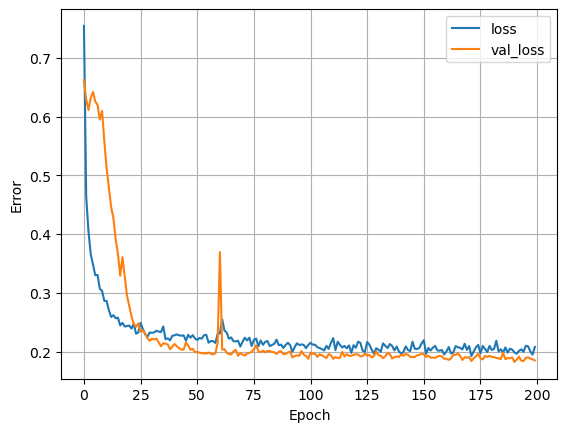

In [40]:
plot_loss(history)

49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


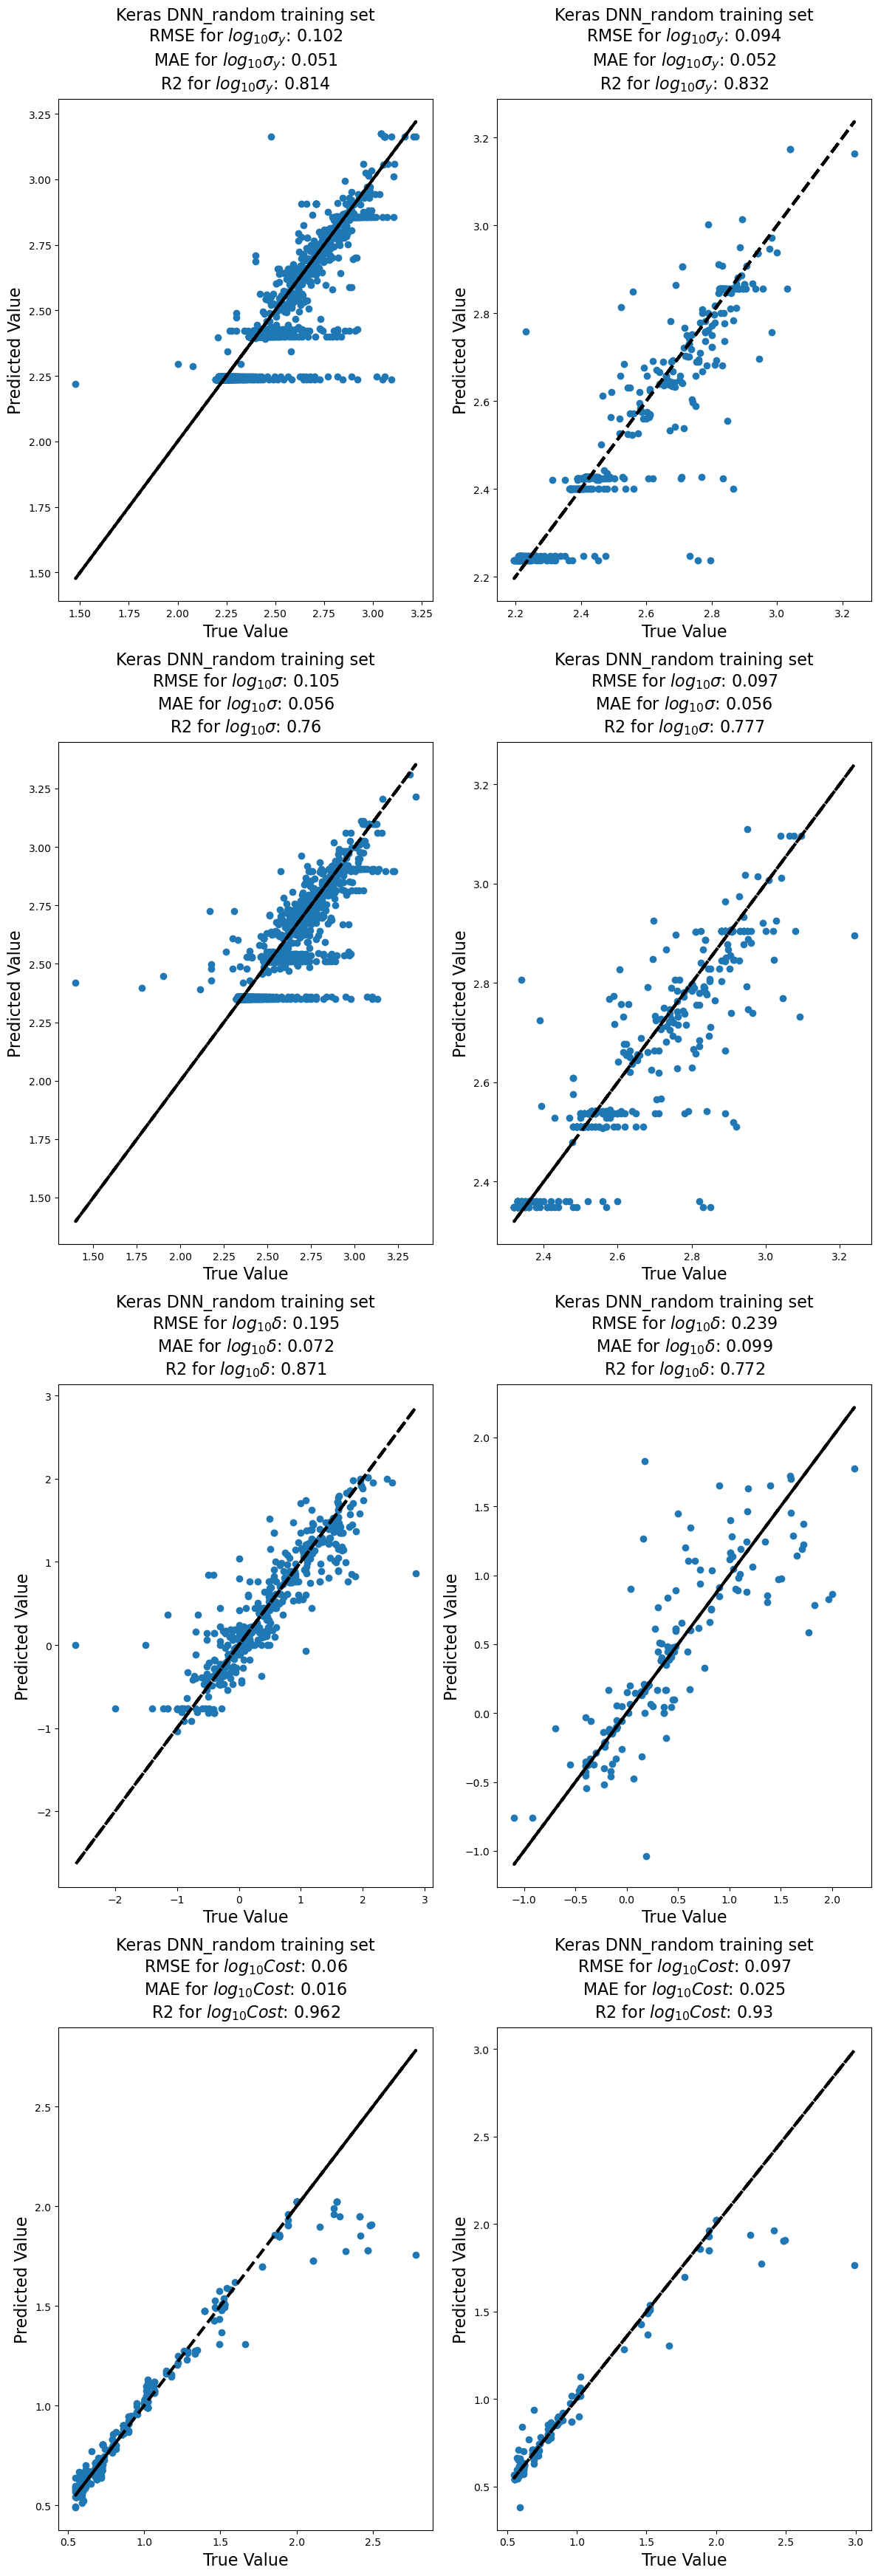

In [41]:
# Use the trained Keras model to predict on the training and test sets
y_pred_train=model3.predict(X_train)
y_pred_test=model3.predict(X_test)

# Plot the training results
rmse, mae, R2 = plot('Keras DNN_random', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Keras DNN_random'] = rmse
mae_scores['Keras DNN_random'] = mae
R2_scores['Keras DNN_random'] = R2

In [45]:
# Creating dataframe of the metrics of the 4 regressors used 
rmse = pd.DataFrame(list(rmse_scores.items()),columns = ['Regressor','RMSE'])
mae = pd.DataFrame(list(mae_scores.items()),columns = ['Regressor','MAE'])
r2 = pd.DataFrame(list(R2_scores.items()),columns = ['Regressor','R2'])
scores_df = pd.concat([rmse,mae.iloc[:,1],r2.iloc[:,1]],axis=1)
scores_df

,Regressor,RMSE,MAE,R2
0,Random Forest,"{'logYS': [0.0811611956669649], 'logTS': [0.08...","{'logYS': [0.0494627418340185], 'logTS': [0.05...","{'logYS': [0.8748827676311259], 'logTS': [0.83..."
1,Extra Trees,"{'logYS': [0.08711105654690371], 'logTS': [0.0...","{'logYS': [0.05140382343803648], 'logTS': [0.0...","{'logYS': [0.8558658741067359], 'logTS': [0.80..."
2,Keras DNN_rectangle,"{'logYS': [0.09553513437833536], 'logTS': [0.1...","{'logYS': [0.050150109272467075], 'logTS': [0....","{'logYS': [0.8266409598000951], 'logTS': [0.75..."
3,Keras DNN_converge,"{'logYS': [0.09985290698548352], 'logTS': [0.1...","{'logYS': [0.055421824621473846], 'logTS': [0....","{'logYS': [0.8106166990832508], 'logTS': [0.75..."
4,Keras DNN_random,"{'logYS': [0.09414266438389422], 'logTS': [0.0...","{'logYS': [0.05181172377324192], 'logTS': [0.0...","{'logYS': [0.8316577114566666], 'logTS': [0.77..."


In [43]:
# Exporting the performance metric results
scores_df.to_excel('MPR models metrics.xlsx')